<a href="https://colab.research.google.com/github/alphthonio/My-MIT-/blob/Master/My_Learner%2BNotebook%2B_%2BFull%2BCode%2BVersion%2B_%2BPotential%2BCustomers%2BPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Setting the random seed to 1 for reproducibility of results
import random;
random.seed(1);
np.random.seed(1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
learn = pd.read_csv("/content/drive/MyDrive/My_MIT_Work/ExtraaLearn.csv")

In [4]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

## Data Overview

- Observations
- Sanity checks

View the top five rows of the dataset

In [5]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


View the last five rows of the dataset

In [6]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [7]:
# To get the shape of the dataset
data.shape

(4612, 15)

* This shows that there are 4612 rows and 15 columns.

In [8]:
# checking the datatypes of the columns in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

* There are 4612 observations and 15 columns in the dataset.
* All the columns have 4612 non-null values, so, there are no missing values in the data.
* There are five numerical variables (Age, website_visits, time_spent_on_website, page_views_per_visit and status), and the rest are of object datatypes and categorical in nature.

In [9]:
# Checking for any missing values
data.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


* This again confirms that there are no missing values in the dataset.

In [10]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate rows in the dataset.

In [11]:
# Checking for unique values in each column
data.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


 * The column 'ID' is an identifier number which is unique for each customer and cannot add any predictive power to the machine learning model, and hence, should be dropped.

In [12]:
# dropping the ID column
data.drop(columns=['ID'], inplace=True)

In [13]:
data.head(3)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [14]:
# Creating numerical columns
num_cols=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit','status']
num_cols.remove('status')


In [15]:
# Creating categorical variables
cat_cols= ['current_occupation','first_interaction', 'profile_completed', 'last_activity',
           'print_media_type1','print_media_type2','digital_media','educational_channels','referral']

** Univariate analysis for the numerical variables

In [16]:
 # Let us view the statistical summary of the numerical columns in the dataset and set the format of the values to floats with 6 decimal places.
pd.set_option('display.float_format', lambda x: '%.6f' % x)
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.000000,46.201214,13.161454,18.000000,36.000000,51.000000,57.000000,63.000000
website_visits,4612.000000,3.566782,2.829134,0.000000,2.000000,3.000000,5.000000,30.000000
time_spent_on_website,4612.000000,724.011275,743.828683,0.000000,148.750000,376.000000,1336.750000,2537.000000
page_views_per_visit,4612.000000,3.026126,1.968125,0.000000,2.077750,2.792000,3.756250,18.434000


* Status has aminimum value of 0 and a maximum value of 1
* The difference between the 75th percentile of website_visits and its maximum value is high, showing the presence of outliers.
* Average customer age is around 46 years and age variable has a high range, from 18 years to 63, indicating a good age diversity.
* At least 50% of the leads visited the website three times.
* All except age has a minimum value of zero.

**Let's explore these variables in some more depth by observing their distributions**

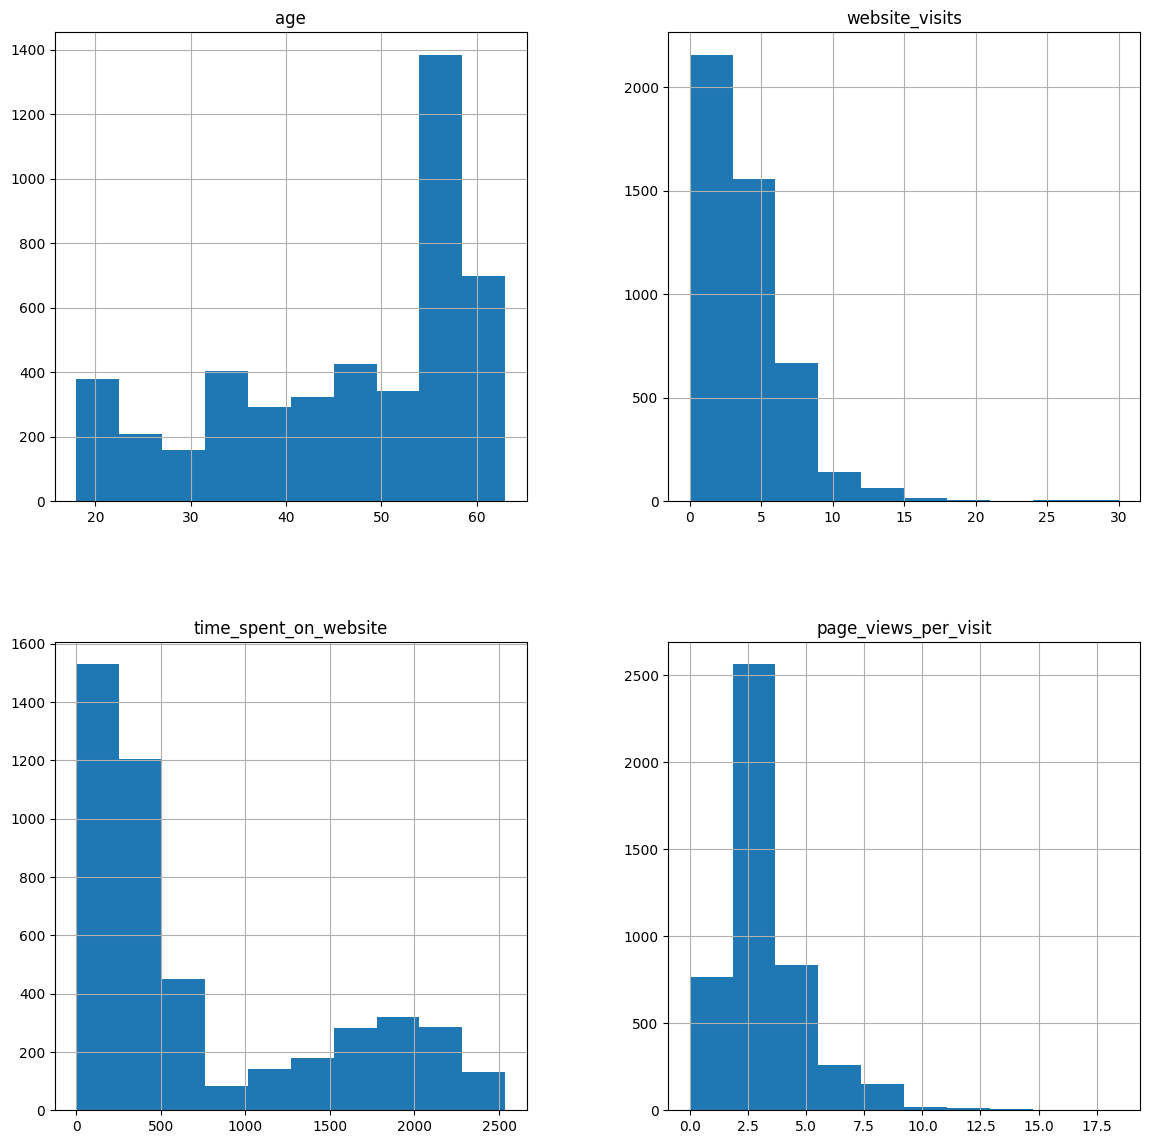

In [17]:
data[num_cols].hist(figsize=(14,14))
plt.show()

* Age variable distribution is left skewed indicating that the majority of the leads are middle aged in their late 40s and above.
* Website visit is right skewed and shows that majority of the leads browsed the company's website but not more than five times. And the number that visited the website more than 10 times are highly negligible.
* Time spent on the website is right skewed showing that a good number of people spent a considerable amount of time on their site and this variable could drive the lead conversion process.
* The mean number of pages viewed is approximately 3 and some leads did not view any page at all.

checking how the target variable 'status' is related with other numerical variables.

In [18]:
# Mean of numerical variables grouped by status
data.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


* Leads converted tend to spend more time on the website, nearly 45% more than those not converted to paid customers.
* The number of times the leads visit the website and the number of pages they view when on the site do not contribute appreciable to the analysis as both showed only 1% difference on how they impact the status.
* The difference on whether age leads to a positive(conversion to a customer) or a negative status is only 7%.

In [19]:
cat_cols

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

### **Univariate analysis for categorical variables**

In [20]:
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('*'*40)

current_occupation
Professional   0.567216
Unemployed     0.312446
Student        0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website      0.551171
Mobile App   0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High     0.490893
Medium   0.485906
Low      0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity     0.493929
Phone Activity     0.267563
Website Activity   0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No    0.892238
Yes   0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No    0.949480
Yes   0.050520
Name: proportion, dtype: float64
****************************************
digital_media
No    0.885733
Yes   0.114267
Name: proportion, dtype: float64
****************************************
educational_channel

**Observations:

* 12% of the leads are students while the rest are either professionals or unemployed.
* 55% of the lead had their first interaction with ExtraLearn on their website while 45% had theirs via phone calls.
* Only about 2% of the lead do not have 50% of their profile completed. And just about the same number of leads were introduced to ExtraLearn through referrals.
* The number of the leads who saw the ads on newspapers is twice the number who saw it on the magazines.
* 11% saw the ad on digital media while 15% saw it on educational channels.


### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables. Let's now check how the target variable 'status' is related with other categorical variables.

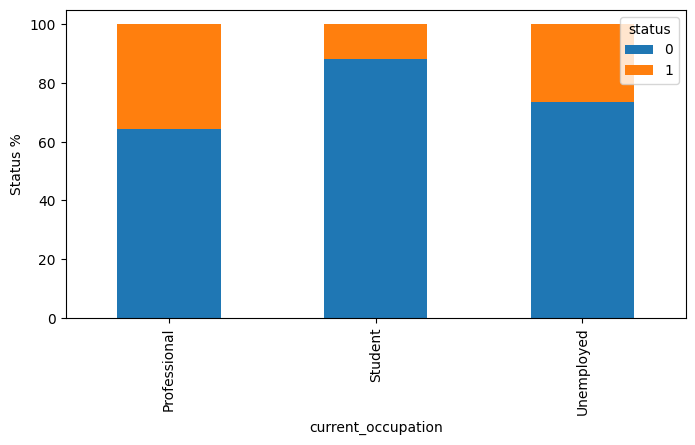

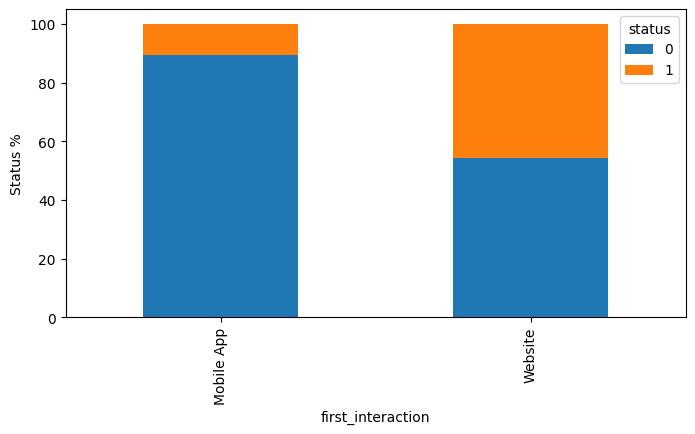

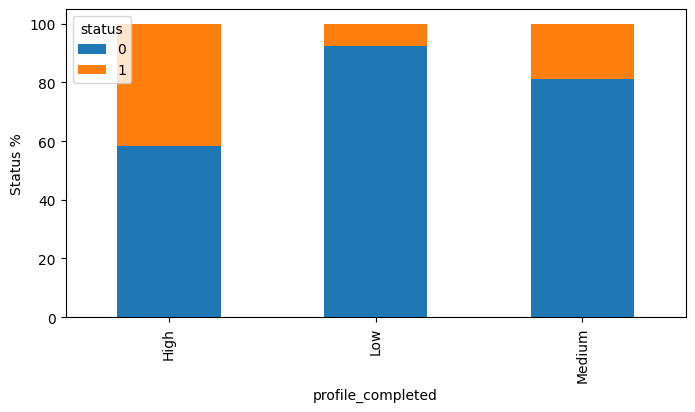

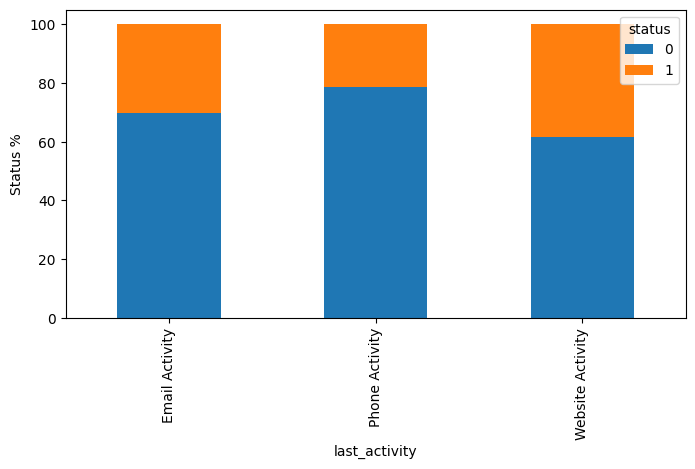

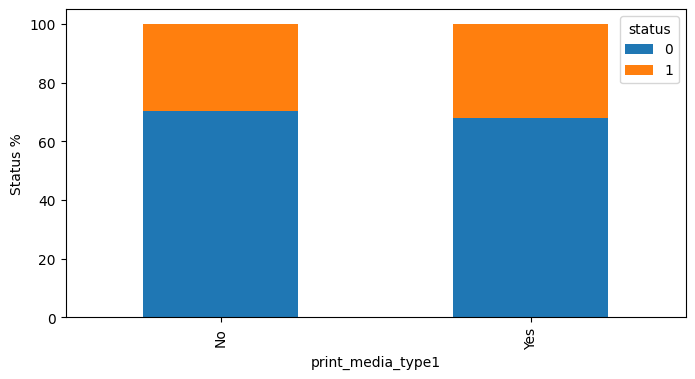

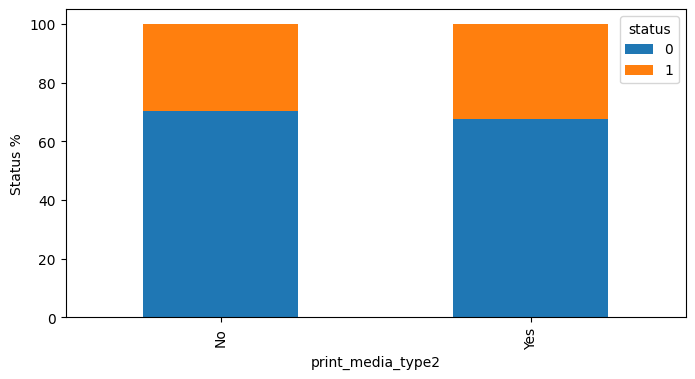

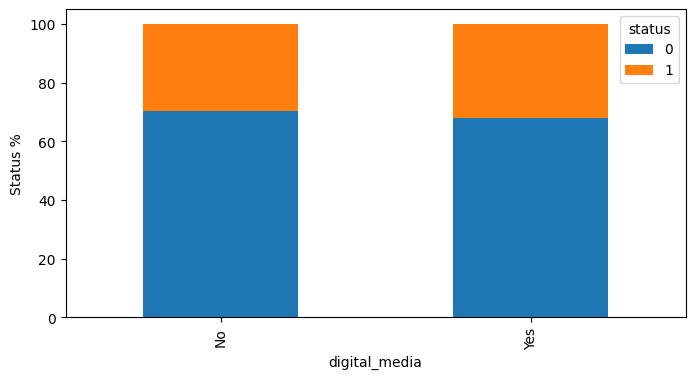

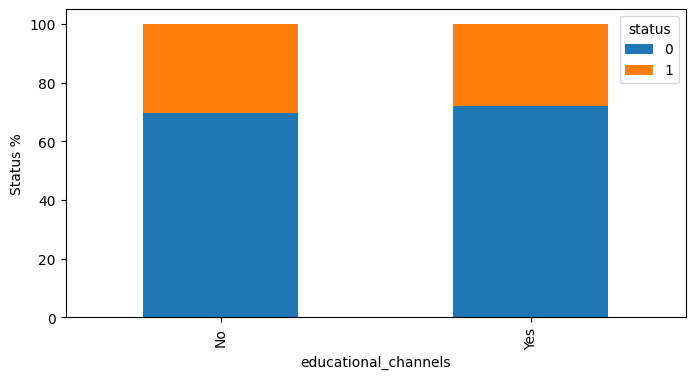

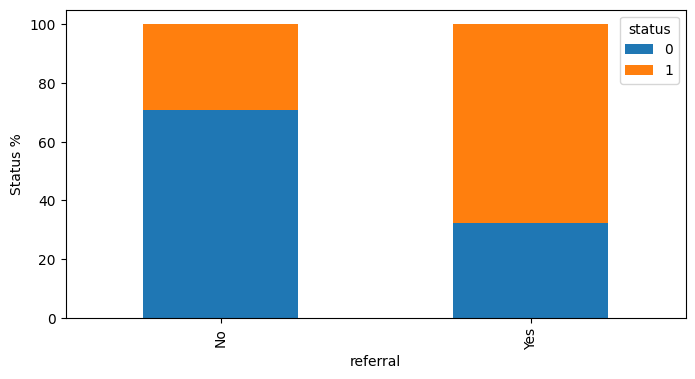

In [21]:
for i in cat_cols:
    if i!='status':
        (pd.crosstab(data[i],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Status %')

* 35% of professionals were converted to paid customers while only 12% of the students were, showing that Current Occupation plays a vital role.
* Majority of the leads had no reference, but about 65% of those referred were converted to paid customers.
* 30% of the leads that saw the ads on educational channels were converted. Print media1 (newspapers), print media2(magazines),and digital media had same amount of contribution. Hence all advertisement channels are key and should be given equal attention.
* More percentage of leads wih high-rated profile completion were converted to paid customers while only a small percentage of the low-rated were.
* More than 60% of those with first interaction on the website were converted and these group should be given more considerations.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [22]:
# Percentage distribution of the target variable "lead status"
data['status'].value_counts(1)*100

,proportion
status,
0,70.143105
1,29.856895


* 30% of all the leads were converted to paid customers.

In [40]:
# Defining the histgram_boxplot() function
def histogram_boxplot(data, col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(15,10))
  sns.set(style='darkgrid')
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True, orient = 'h')
  sns.distplot(data[col], ax=ax_hist)
  ax_hist.axvline(data[col].mean(), color='green', linestyle='--') # Green line corresponds to the mean in the plot
  ax_hist.axvline(data[col].median(), color='orange', linestyle='-') # Orange line corresponds to the median in the plot
  plt.show()

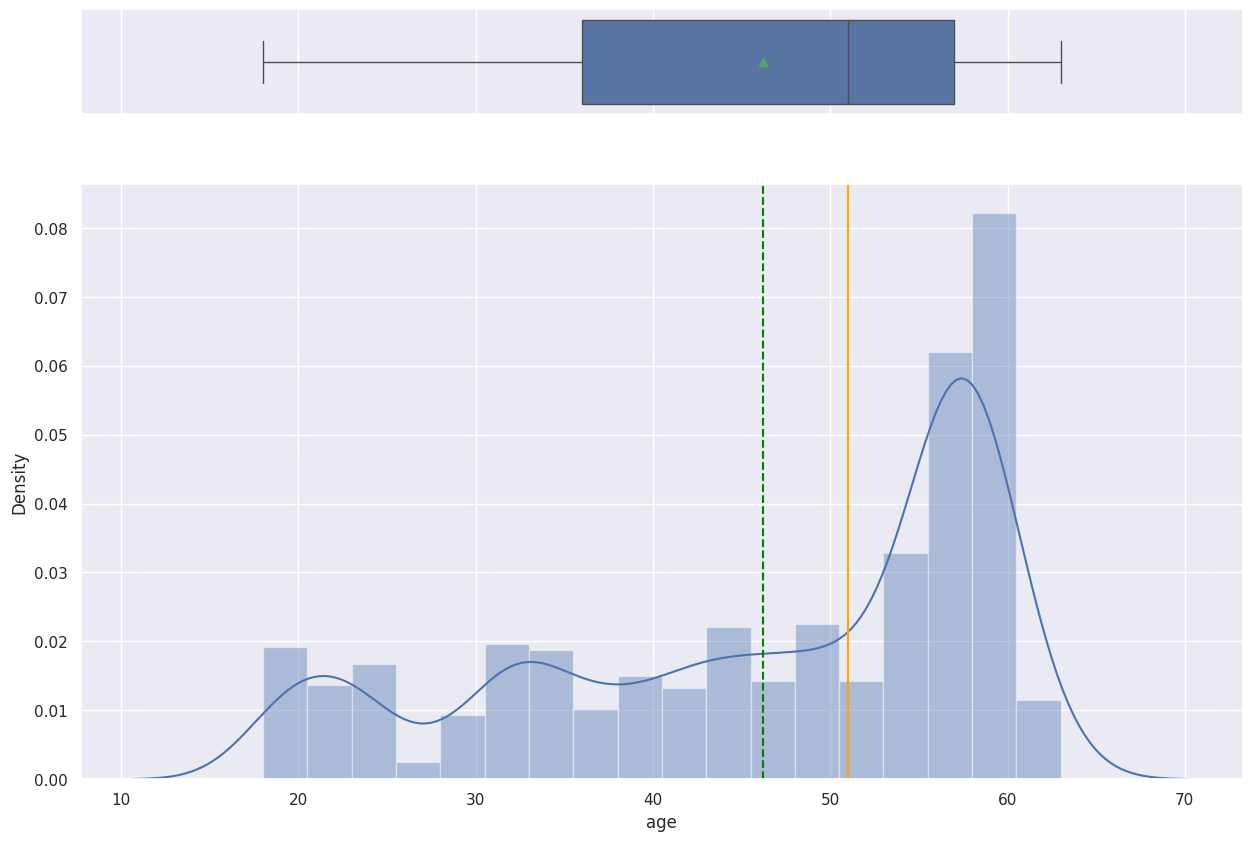

In [41]:
histogram_boxplot(data, "age")

The hist_plot confirms that the mean age is about 46 and median age is slightly above 50years.

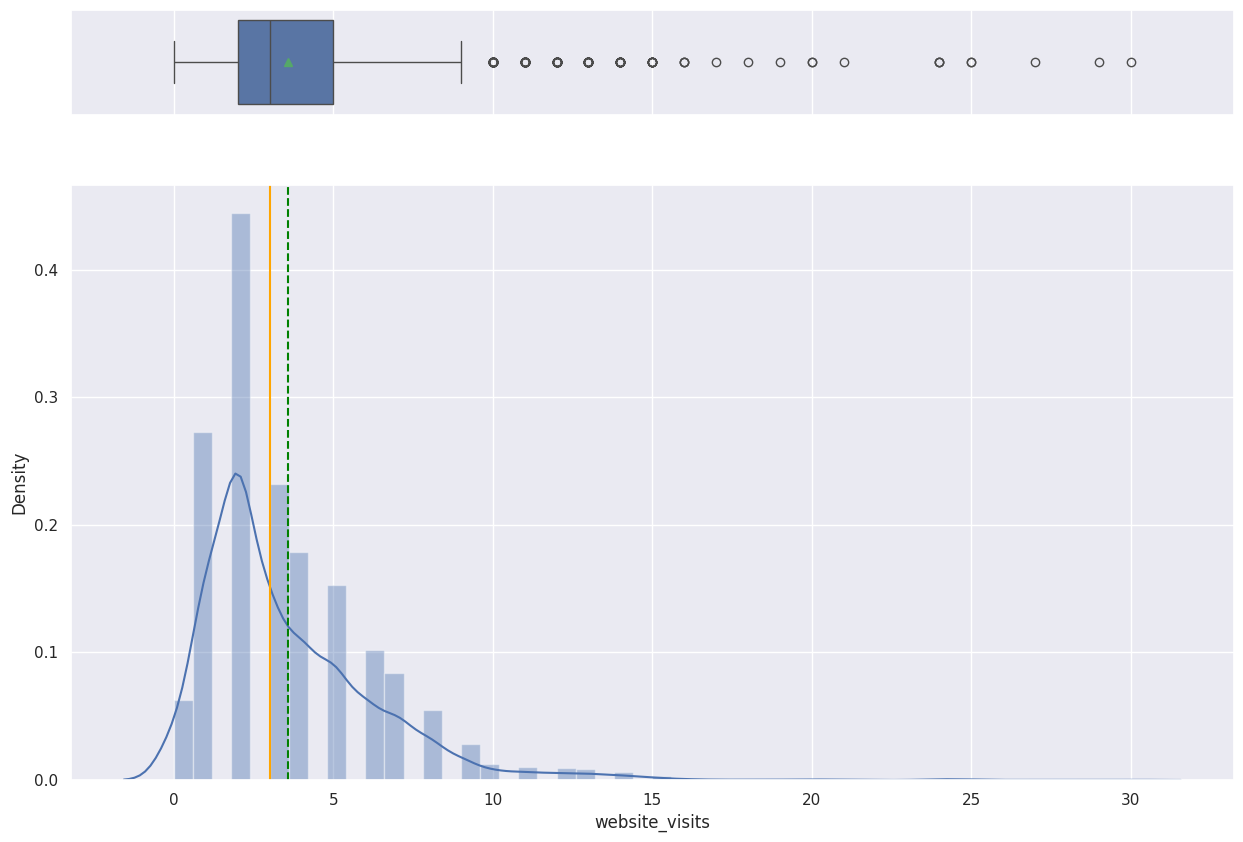

In [43]:
histogram_boxplot(data, "website_visits")

The variable website_visits have a lot of outliers on the right.

In [44]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

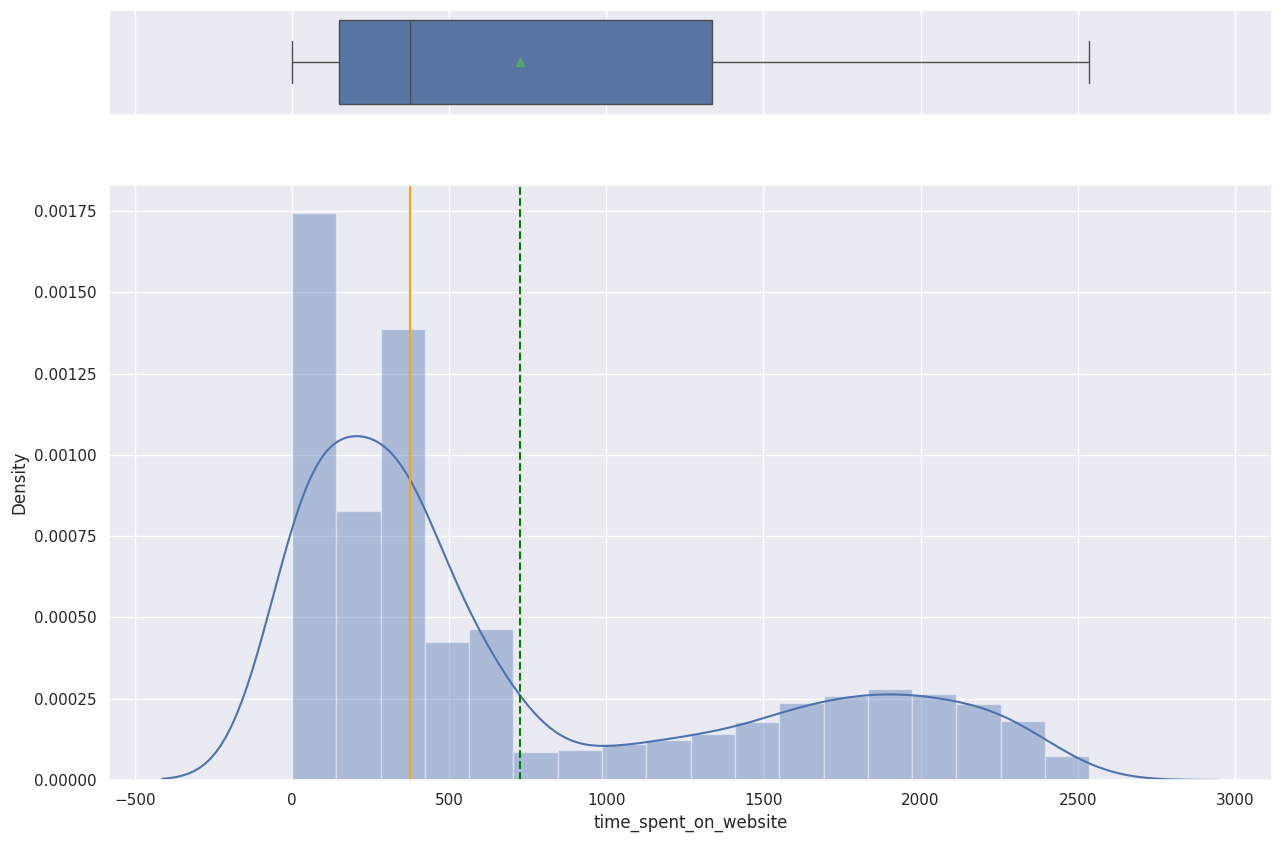

In [45]:
histogram_boxplot(data,'time_spent_on_website')

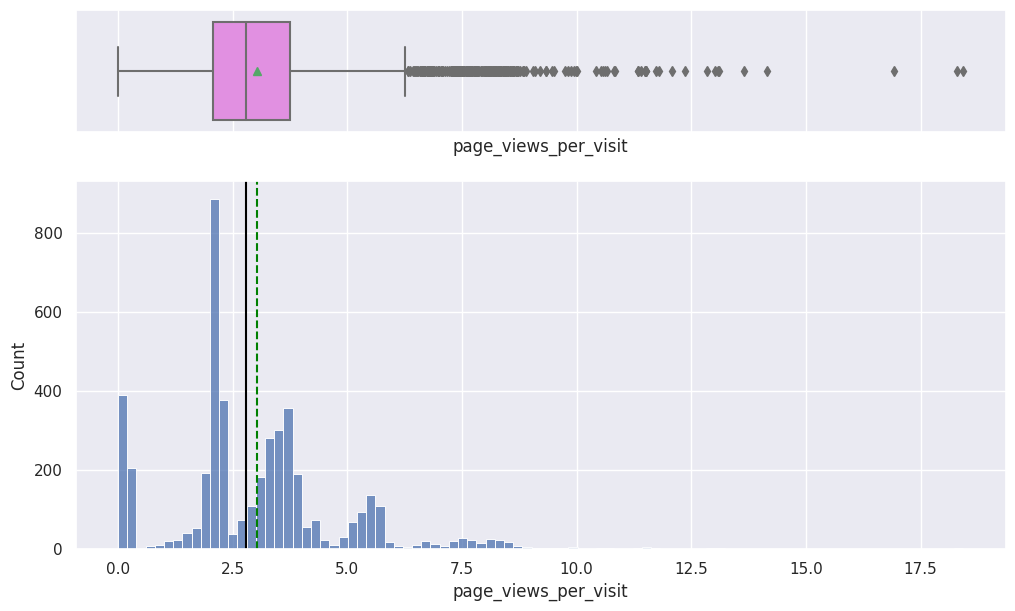

In [ ]:
histogram_boxplot(data,'page_views_per_visit')

There is also the presence of outliers on the right as well for the feature page_views_per_visit.

In [ ]:
# function to create labeled barplots which also provides the same analysis as given above.


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

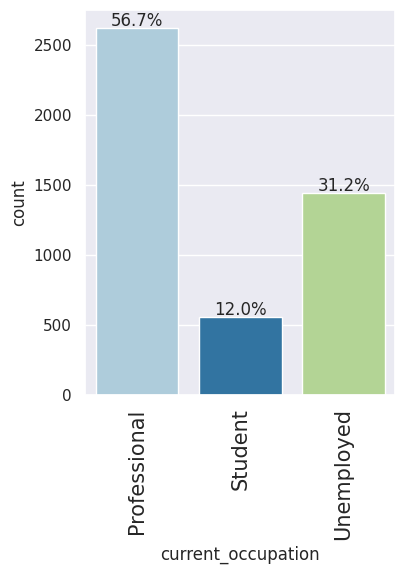

In [ ]:
labeled_barplot(data, "current_occupation", perc=True)

A greater combined percentage of the leads are professional and the unemployed. These people are more likely to spend time online researching or job hunting.

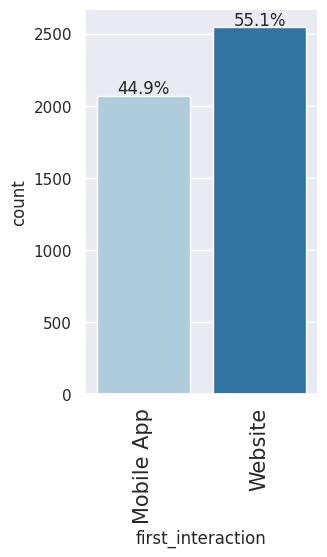

In [ ]:
labeled_barplot(data, "first_interaction", perc=True)

The majority of the first interactions between the leads and the company were established on their website.

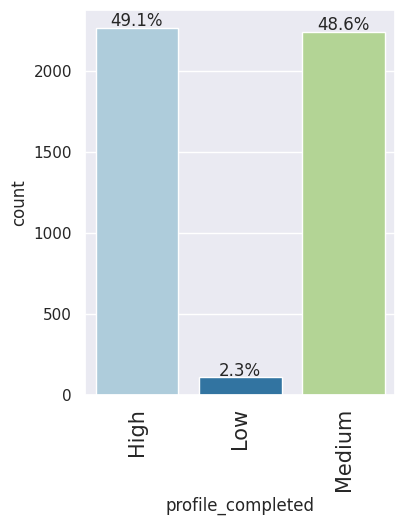

In [ ]:
labeled_barplot(data, "profile_completed", perc=True)

A majority of the leads completed their profile fully.

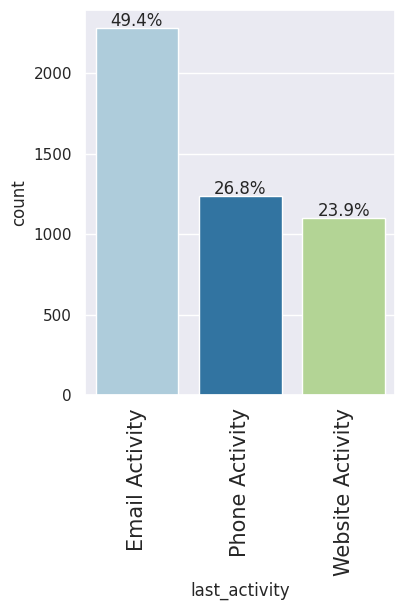

In [ ]:
labeled_barplot(data, "last_activity", perc=True)

A higher percentage of leads after completing their profile online wre contacted by the marketing team of ExtraLearn via emails.

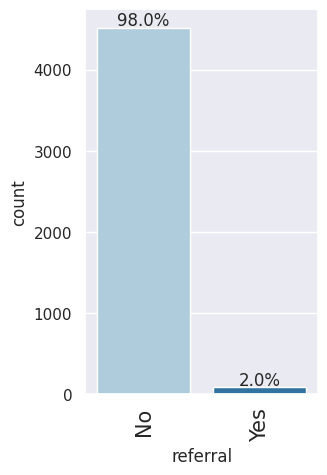

In [ ]:
labeled_barplot(data, "referral", perc=True)

Only 2% of leads with references are likely to be converted.

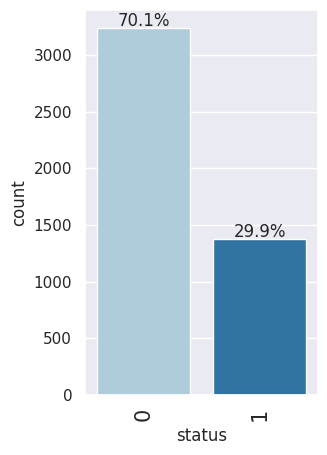

In [ ]:
labeled_barplot(data, "status", perc=True)

### Bivariate Analysis

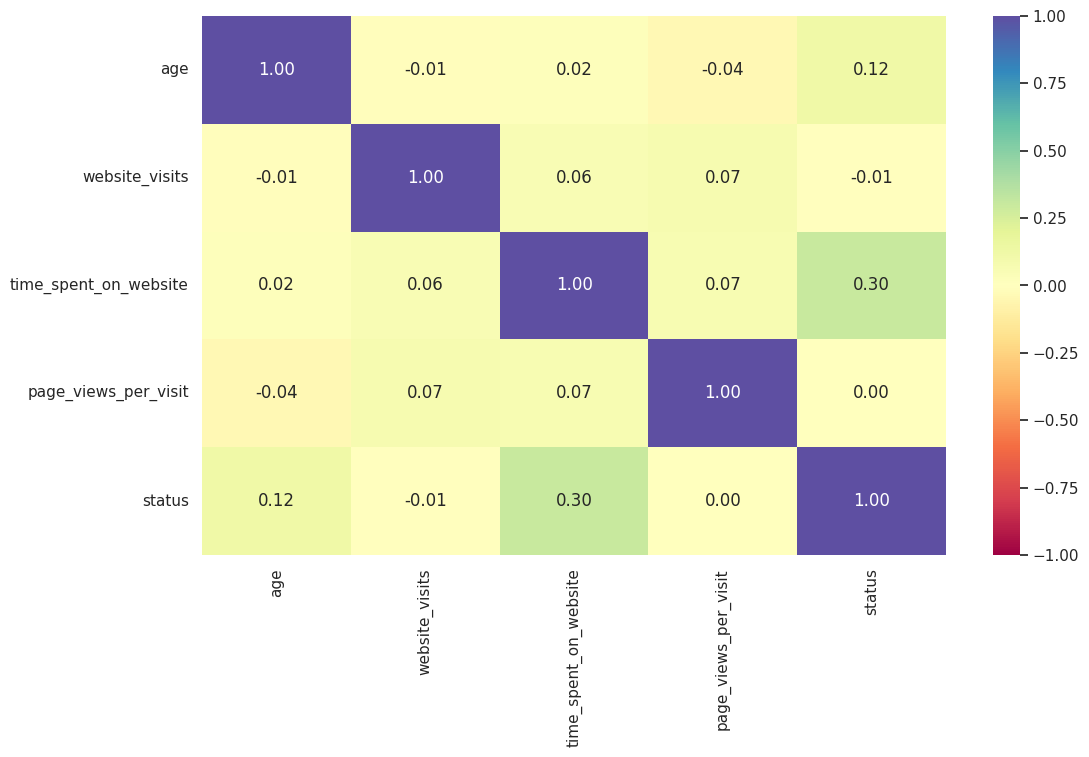

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

***Observations:
The above has confirmed our earlier analysis that time spent on website has a positive correlation with status while age showed slight positive correlation. Also website_visits showed a negative correlation with status while page_views_per_visit has no correlation with status.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


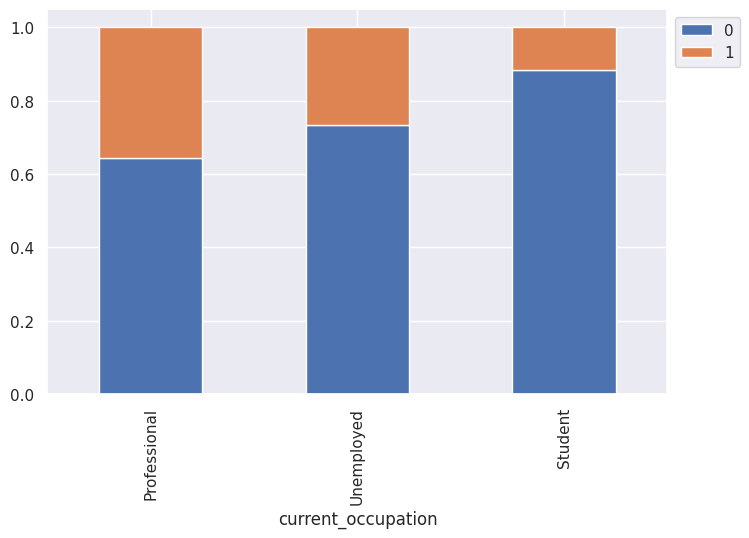

In [ ]:
stacked_barplot(data, "current_occupation", "status")

Age can be a good factor to differentiate between such leads

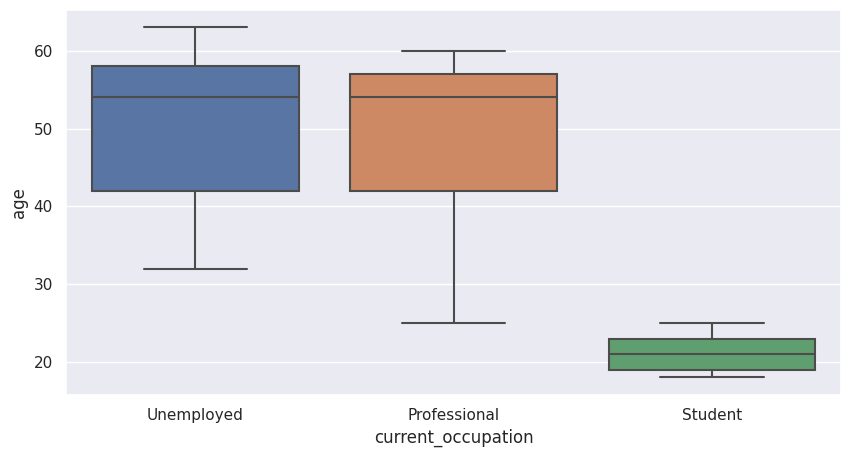

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

In [ ]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.000000,49.347477,9.890744,25.000000,42.000000,54.000000,57.000000,60.000000
Student,555.000000,21.144144,2.001114,18.000000,19.000000,21.000000,23.000000,25.000000
Unemployed,1441.000000,50.140180,9.999503,32.000000,42.000000,54.000000,58.000000,63.000000


The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


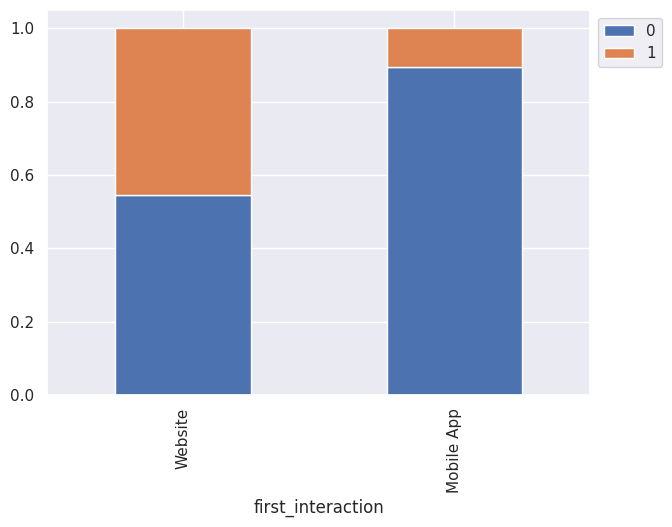

In [ ]:
stacked_barplot(data, "first_interaction", "status")

In [ ]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.000000
1   789.000000
Name: time_spent_on_website, dtype: float64

Let us do a similar analysis for website_visits and page views per visit.

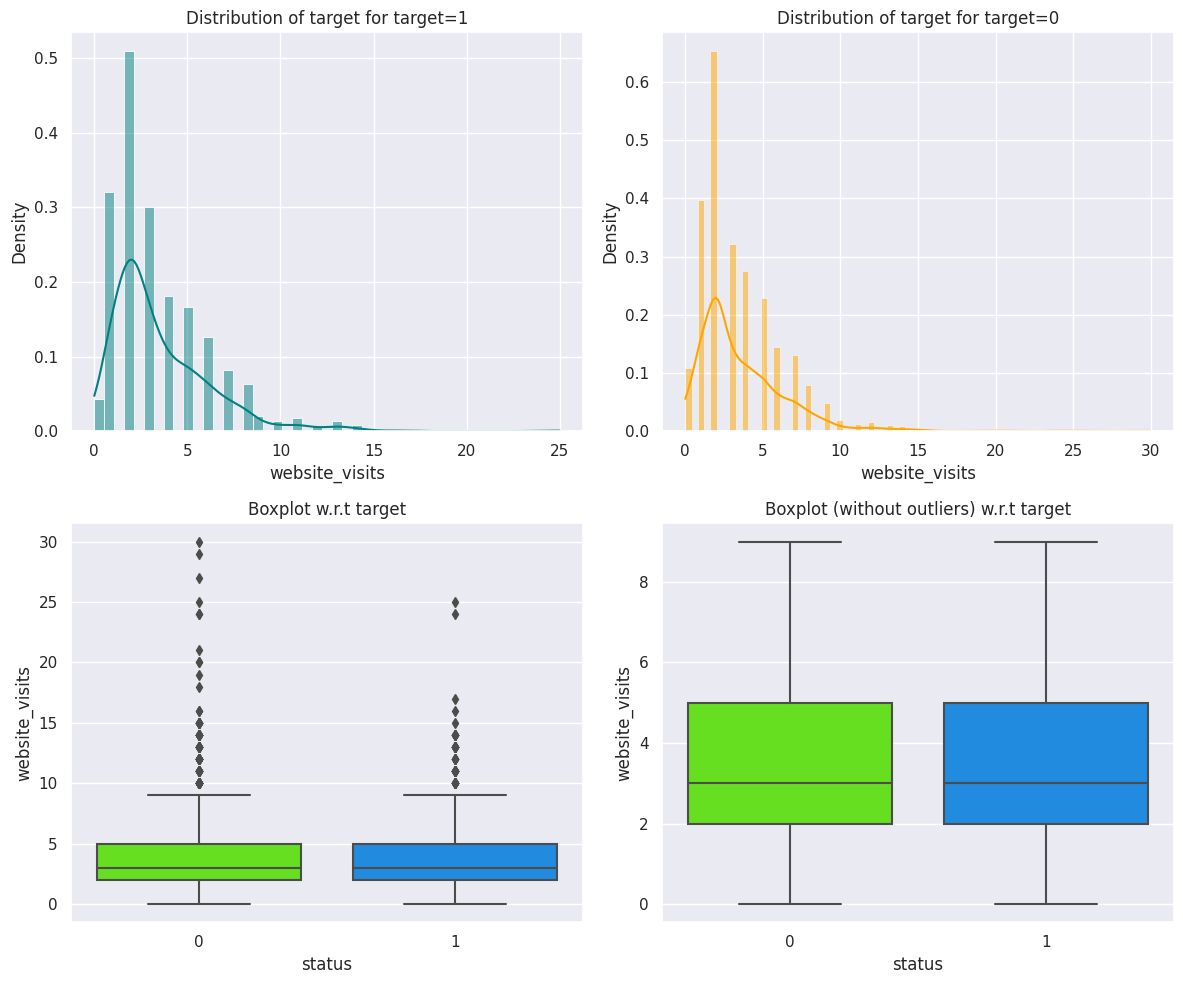

In [ ]:
distribution_plot_wrt_target(data, "website_visits", "status")

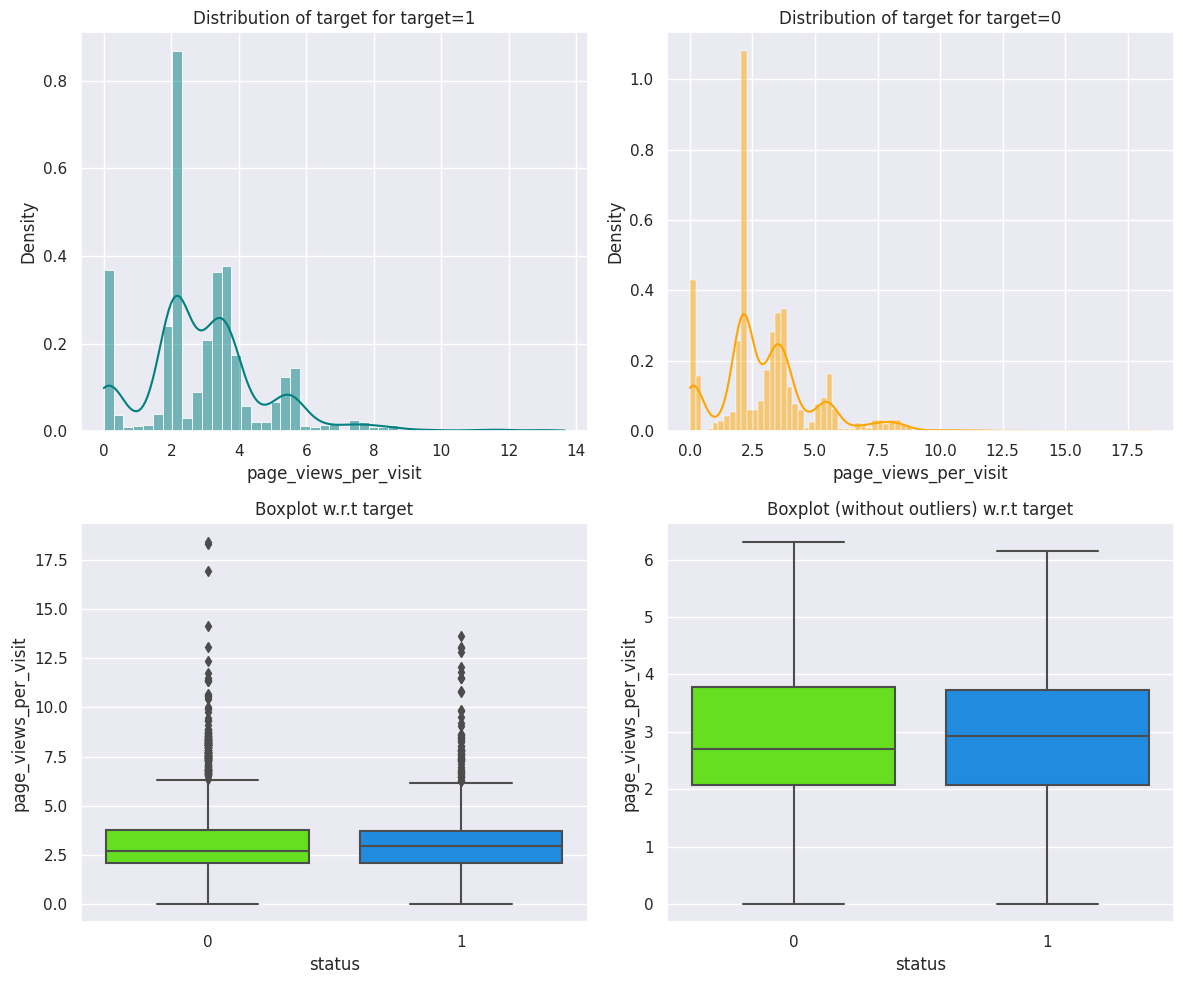

In [ ]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status")

### Outlier Check

- Let's check for outliers in the data.

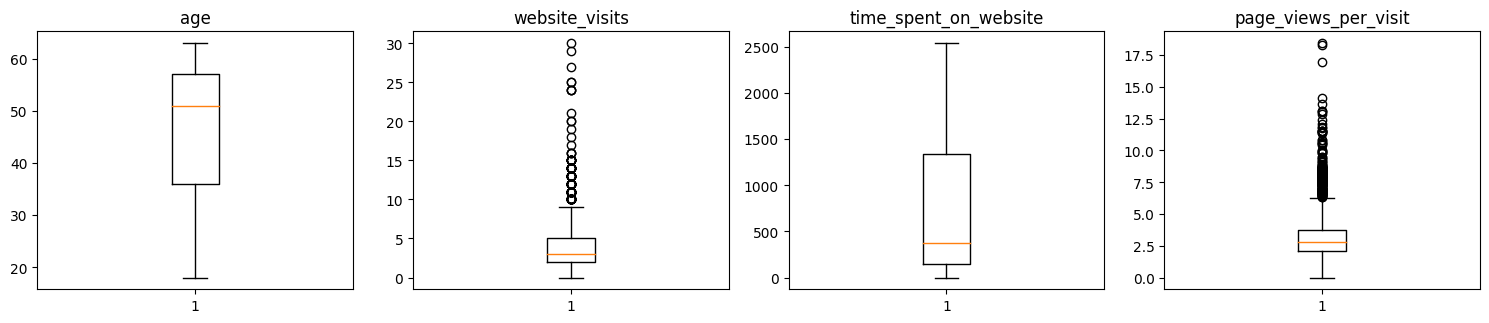

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:

As already seen in the statistical summary, website visits and page views per visit have some outliers in the upper regions of their distributions.



### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# Separating target variable and other variables
X = data.drop(columns=["status"], axis=1)
Y = data.status

In [ ]:
# getting dummies for X
X = pd.get_dummies(X, drop_first=True)

# Splitting the data in 80:20 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)




In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3689, 16)
Shape of test set :  (923, 16)
Percentage of classes in training set:
0   0.704798
1   0.295202
Name: status, dtype: float64
Percentage of classes in test set:
0   0.687974
1   0.312026
Name: status, dtype: float64


In [ ]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a lead will be converted to a paid customer when it does not.
2. Predicting a lead will not be converted to a paid customer when it actually does.

**Which case is more important?**

**predicting that a lead will not be converted to a paid customer when it actually does, i.e losing out on a good prospect for the ExtraLearn company.
This would be considered a major miss for any lead status predictor and hence the more important case of wrong predictions.

**How to reduce this loss i.e the need to reduce False Negatives?**
* **ExtraLearn company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the company can channel more resources towards them and reduce loss of resources incurred from focusing on the false positives.

*** creating a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a model
We will build three models:
* Support Vector Kernel(SVM)
* Decision Tree and
* Random Forest

Let Us build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**

In [ ]:
# Fitting SVM
svm = SVC(kernel='linear') # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2600
           1       0.71      0.69      0.70      1089

    accuracy                           0.83      3689
   macro avg       0.79      0.79      0.79      3689
weighted avg       0.83      0.83      0.83      3689



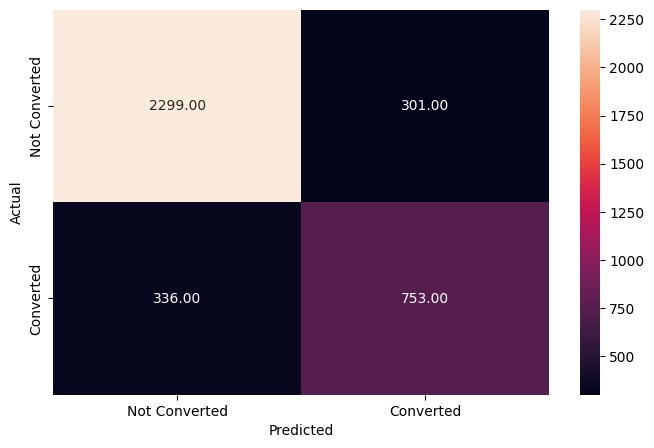

In [ ]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

The accuracy of the model on the training data is 83%. However, the recall is low at  69%.

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       635
           1       0.72      0.65      0.68       288

    accuracy                           0.81       923
   macro avg       0.78      0.77      0.77       923
weighted avg       0.81      0.81      0.81       923



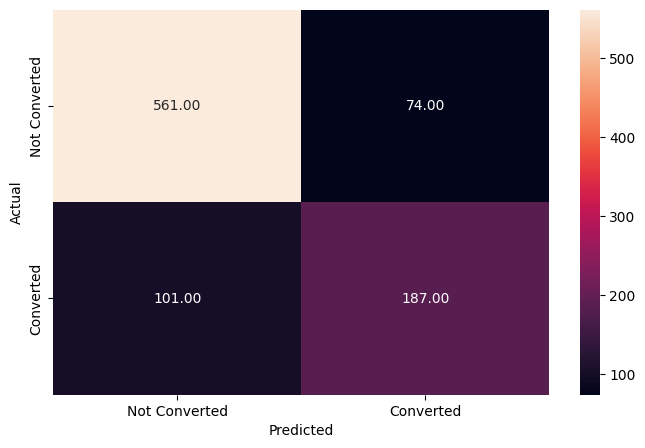

In [ ]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

**Observations:
* The fact that the model performs slightly worse on the test data compared to the training data (Accuracy of 81% vs. 83%) indicates that there might be some level of overfitting.
* The F1-scores on both the training and test data are relatively close, suggesting that the model is not overfitting in terms of F1-score.

**RBF Kernel*

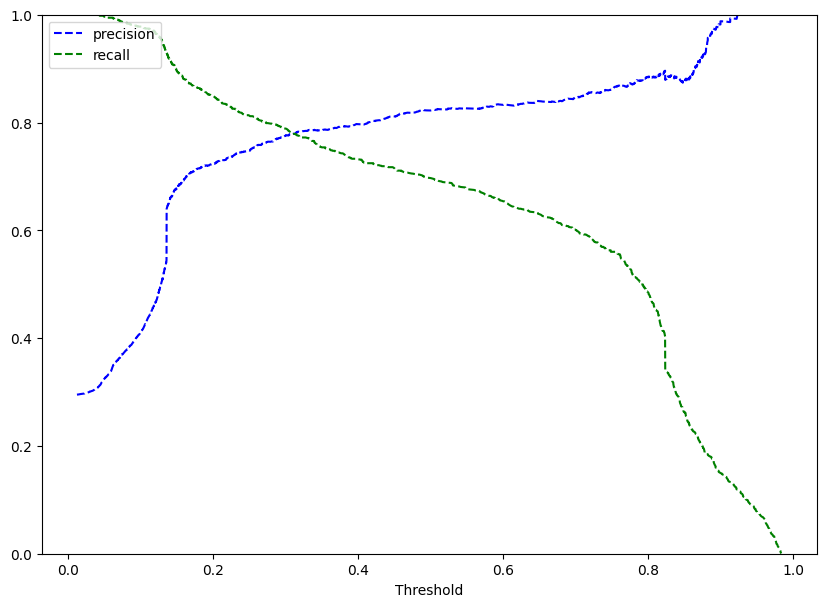

In [ ]:
svm_rbf=SVC(kernel='rbf',probability=True)
# Fit the model
svm_rbf.fit(X_train_scaled,y_train)
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

* The threshold value of 0.35 should be sufficient because it has good recall and does not cause a significant drop in precision.

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2600
           1       0.79      0.75      0.77      1089

    accuracy                           0.87      3689
   macro avg       0.84      0.83      0.84      3689
weighted avg       0.87      0.87      0.87      3689



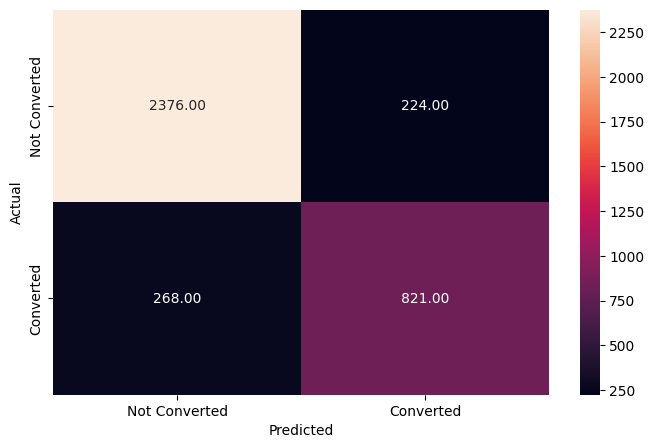

In [ ]:
optimal_threshold_svm=.35
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       635
           1       0.78      0.71      0.74       288

    accuracy                           0.85       923
   macro avg       0.83      0.81      0.82       923
weighted avg       0.84      0.85      0.84       923



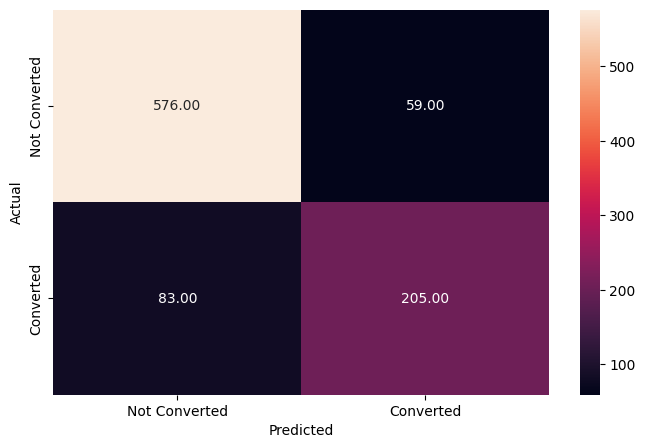

In [ ]:
optimal_threshold_svm=.35
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

*** Observations:
* At the optimal threshold of 0.35, the model has performed better with an increase in both accuracy and recall.

*However, the recall on the test data reduced by 4% showing signs of overfitting on the training data.


### **Decision Tree**

* We will build our model using the **DecisionTreeClassifier function.**
* If the frequency of class A is 17% and the frequency of class B is 83%, then class B will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.17, 1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



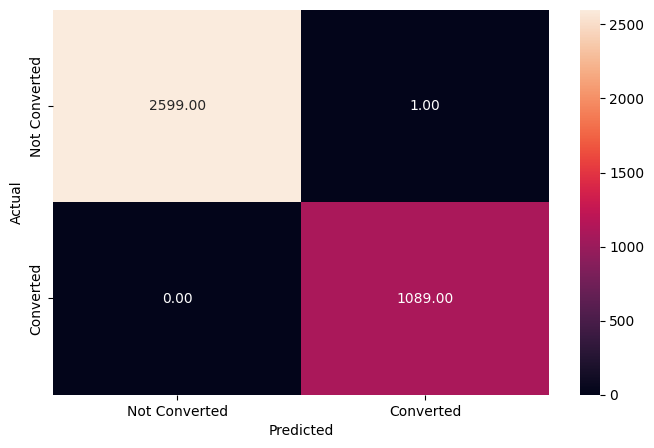

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       635
           1       0.72      0.68      0.70       288

    accuracy                           0.82       923
   macro avg       0.79      0.78      0.79       923
weighted avg       0.82      0.82      0.82       923



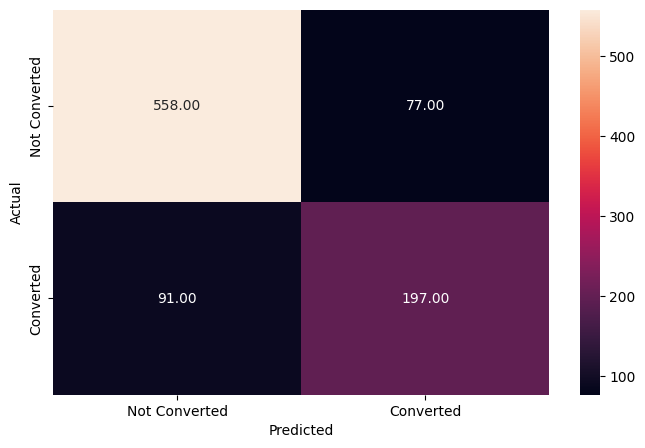

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.68 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The precision on the test data suggests that there's a 28% (1 - 0.72) chance that the model will predict that a lead is going to be converted even when it would not, and **the company may waste their time and energy on these leads who will end up not converted to paid customers.

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data.

**This would tell the model that 1 is the important class here.**

In [ ]:
# Choose the type of classifier
dt_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dt_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



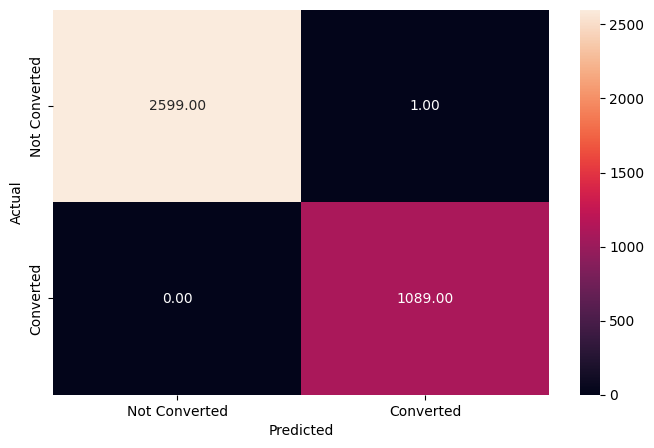

In [ ]:
# Checking performance of the tuned model on the training data
y_pred_train2 = dt_tuned.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The tuned Decision tree is giving a 100% score for all metrics on the training dataset.

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       635
           1       0.72      0.68      0.70       288

    accuracy                           0.82       923
   macro avg       0.79      0.78      0.79       923
weighted avg       0.82      0.82      0.82       923



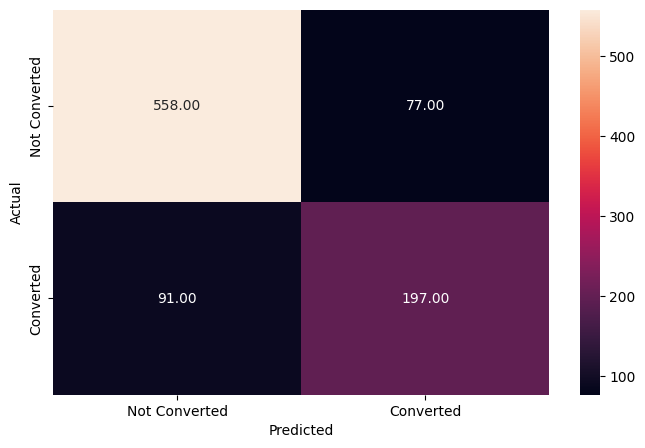

In [ ]:
# Checking performance of the tuned model on the test data
y_pred_test2 = dt_tuned.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

* No observable difference with the untuned model. However, we will visualize the tuned decision tree and observe the decision rules:



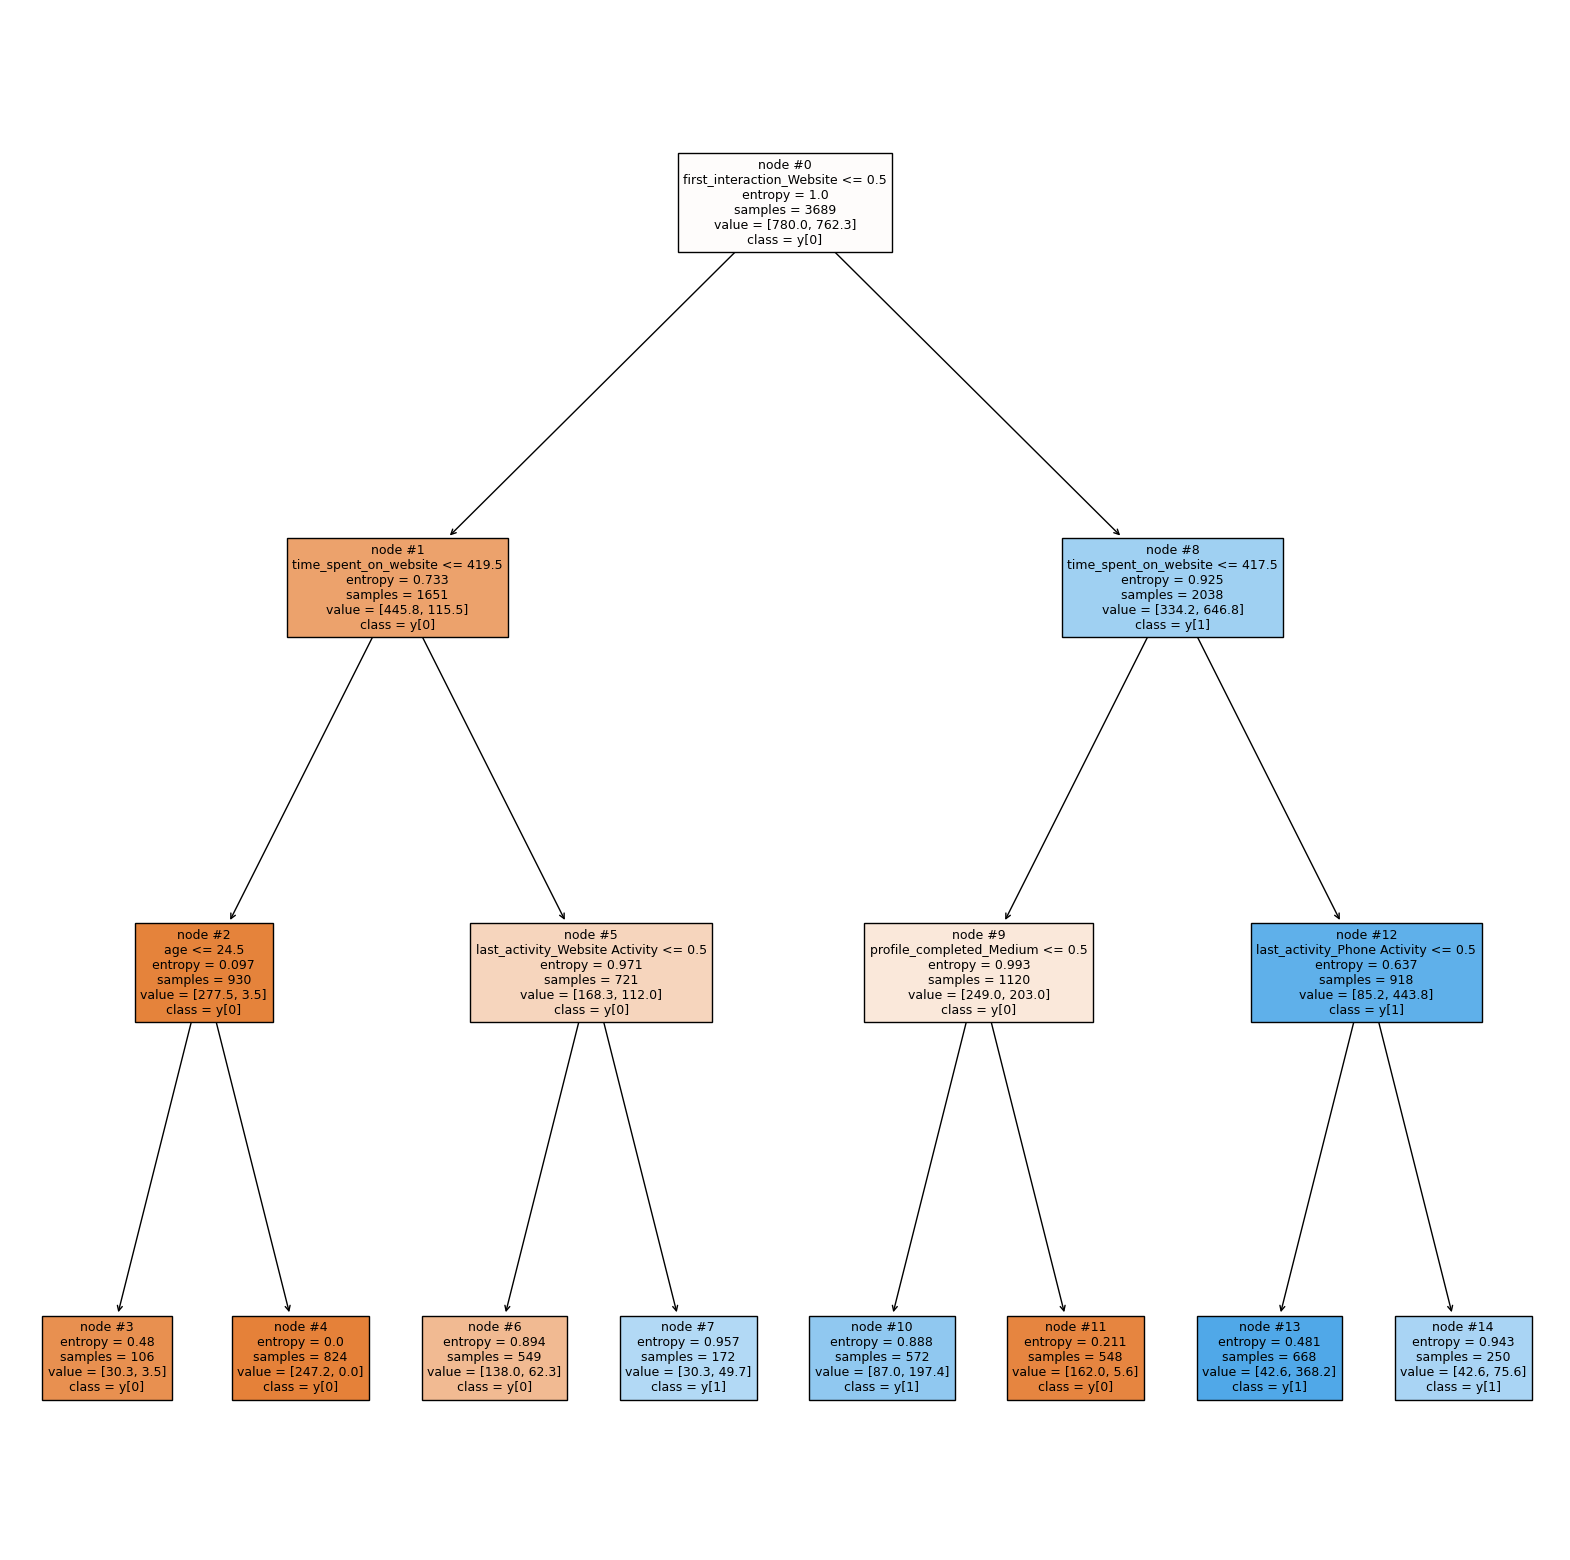

In [ ]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(dt_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations

* The DecisionTree is a 4 depth with 14 nodes.
* We can see that the tree is simple and its rules of the trees are readable.




In [ ]:
# check the most important features of the tuned DecisionTree
print (pd.DataFrame(dt_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
time_spent_on_website          0.348666
first_interaction_Website      0.330727
profile_completed_Medium       0.238480
last_activity_Phone Activity   0.041566
last_activity_Website Activity 0.024321
age                            0.016240
website_visits                 0.000000
page_views_per_visit           0.000000
current_occupation_Student     0.000000
current_occupation_Unemployed  0.000000
profile_completed_Low          0.000000
print_media_type1_Yes          0.000000
print_media_type2_Yes          0.000000
digital_media_Yes              0.000000
educational_channels_Yes       0.000000
referral_Yes                   0.000000


The above showed the six most important features that contribute to the lead conversion process as time_spent_on_website, first_interaction_Website, profile_completed_Medium, last_activity_Phone Activity,last_activity_Website Activity and Age.

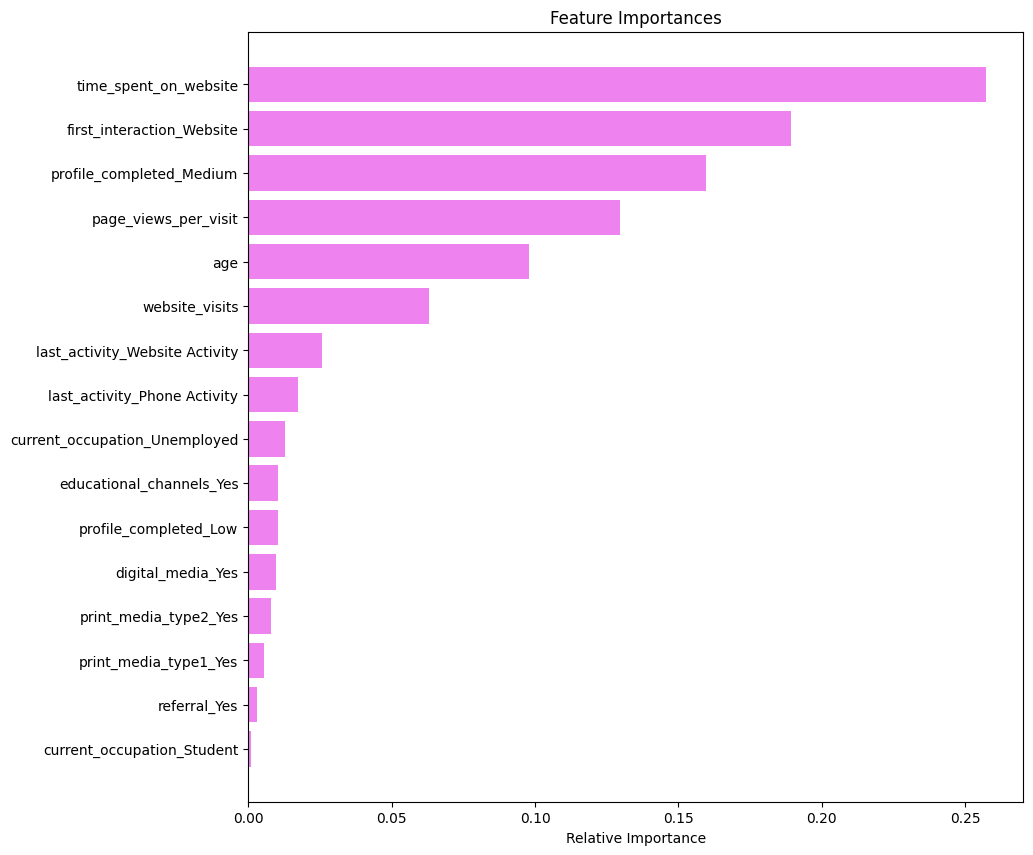

In [ ]:
# Plot the feature importance of the tuned DecisionTree

importance = dt_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

- According to the tuned Decision Tree, **Time spent on website is the most important feature, followed by first_interaction(via website), profile_completed(medium level),page_views_per_visit, Age, website_visits,and last activity(website activity).
- This might signify that people who are readily converted are the ones who have more experience and need for websites and spend longer time online either conducting researches like the professionals or job hunting like the unemployed.


## Do we need to prune the tree?

In [ ]:
# The DecisionTree needs to be pruned becaused it has shown to perform well on the training data than on the test data.
# The model needs to be pruned to avoid overfitting at the individual tree levels while applying the Random Forest method.

## Building a Random Forest model

In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



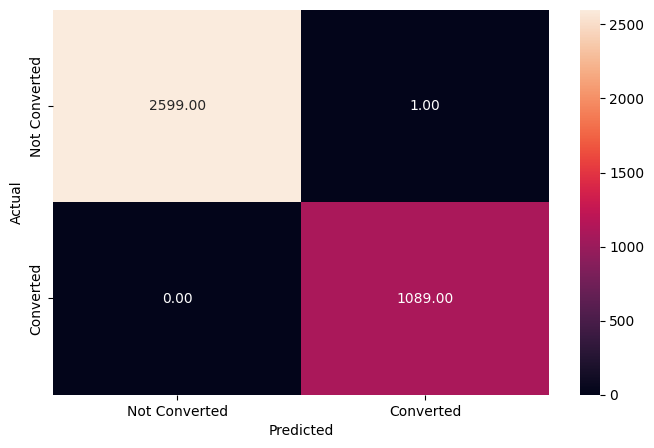

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       635
           1       0.81      0.69      0.75       288

    accuracy                           0.85       923
   macro avg       0.84      0.81      0.82       923
weighted avg       0.85      0.85      0.85       923



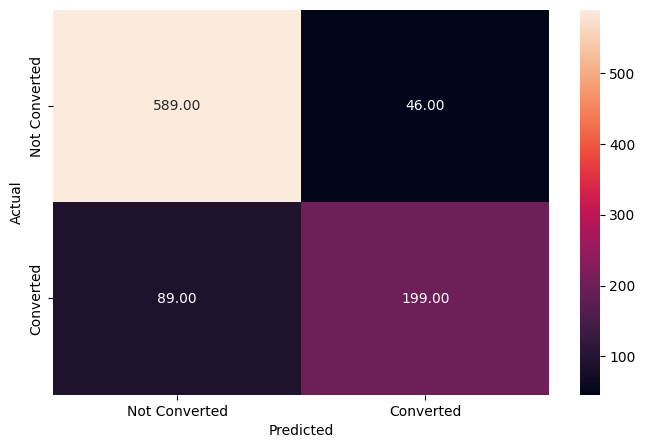

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only ~ 0.69 for class 1.


In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_features='auto',
                       min_samples_leaf=3, random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      2600
           1       0.81      0.99      0.89      1089

    accuracy                           0.93      3689
   macro avg       0.90      0.94      0.92      3689
weighted avg       0.94      0.93      0.93      3689



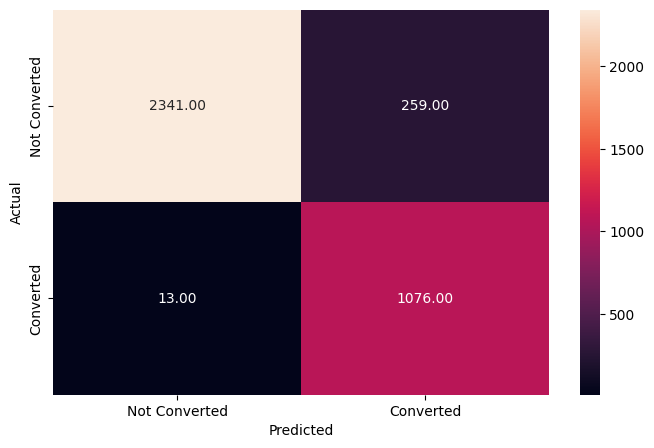

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       635
           1       0.73      0.84      0.78       288

    accuracy                           0.85       923
   macro avg       0.83      0.85      0.84       923
weighted avg       0.86      0.85      0.86       923



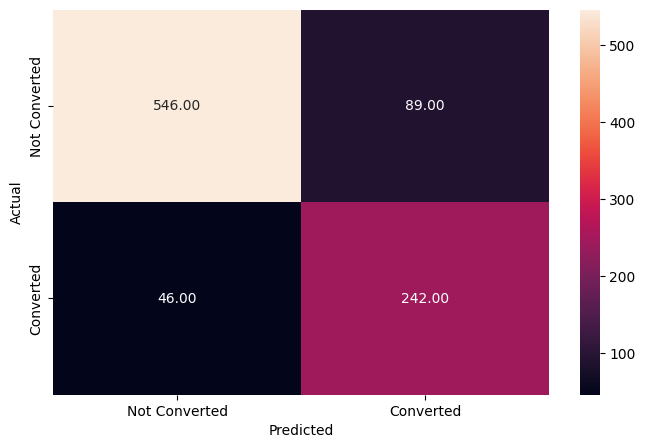

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**

- The tuned Random Forest model is also slightly overfitting the training dataset, but **it shows a good performance on the test dataset.**
- **The recall for class 1 has improved with a small decrease in precision**.
- **This model is the best-performing one among all the models so far,** and is giving us good precision and recall scores on both the training and test datasets.

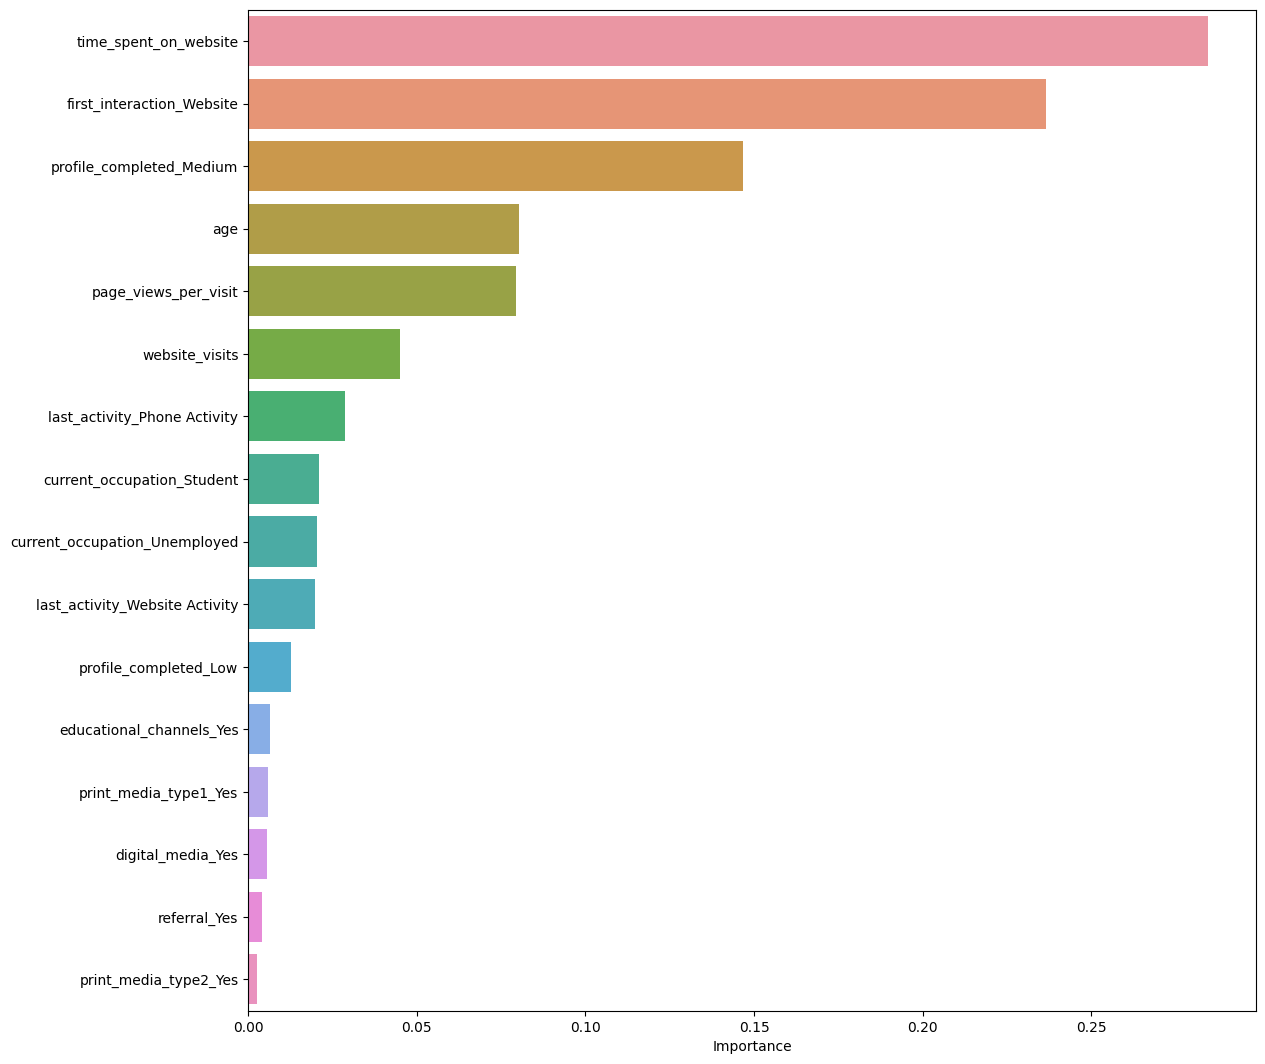

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)
plt.show()

**Let's check the feature importance of the Random Forest**

In [ ]:
grid_obj.best_params_
grid_obj.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=0.9, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=110, random_state=7)

In [ ]:
rf_estimator = grid_obj.best_estimator_

In [ ]:
# Fit the best estimator to the data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=0.9, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=110, random_state=7)

In [ ]:
# check the most important features of the Random Forest
print (pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
time_spent_on_website          0.270513
first_interaction_Website      0.186855
profile_completed_Medium       0.123505
page_views_per_visit           0.115731
age                            0.101995
website_visits                 0.063890
last_activity_Phone Activity   0.024683
last_activity_Website Activity 0.019880
current_occupation_Unemployed  0.019755
current_occupation_Student     0.016561
profile_completed_Low          0.012132
educational_channels_Yes       0.010899
digital_media_Yes              0.010879
print_media_type1_Yes          0.009948
print_media_type2_Yes          0.006672
referral_Yes                   0.006104


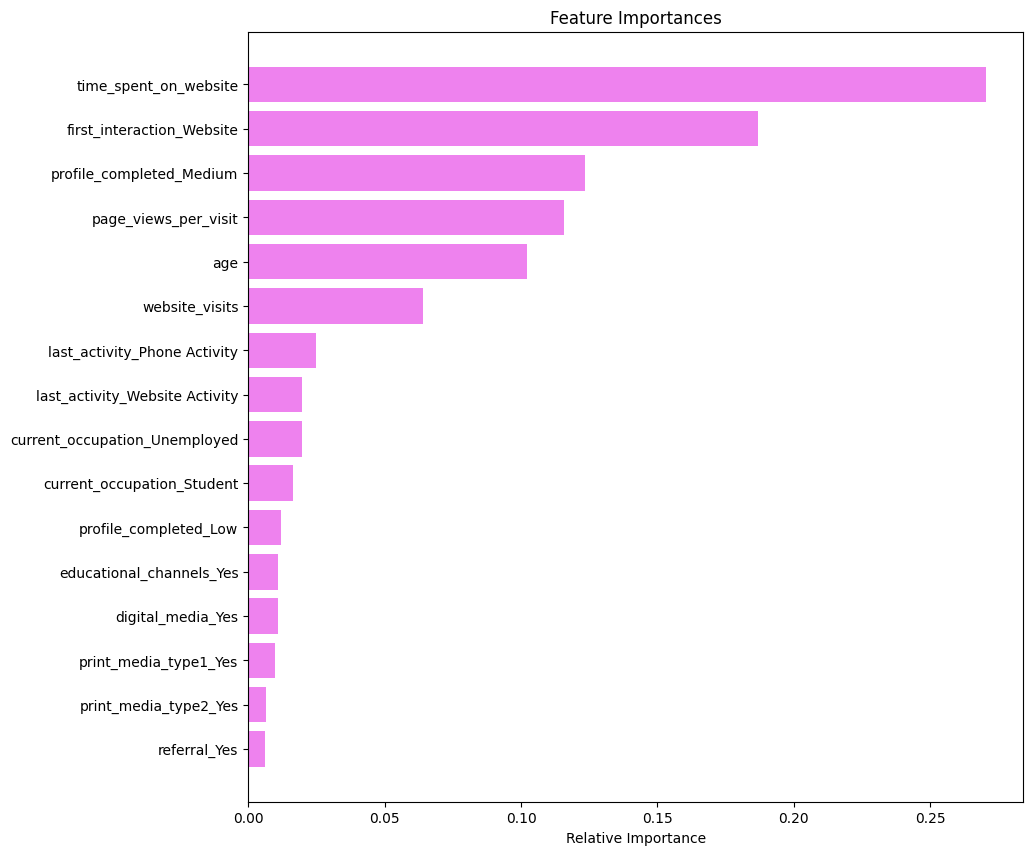

In [ ]:
importance = rf_estimator.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()




## Actionable Insights and Recommendations


* Of the three models used SVM, DecisionTree and Random Forest, the tuned random forest model is the best performing model as it generalised considerable well on the test data with an accuracy and a recall of 85% and 84% respectively.
* We have been able to build a predictive model that can be used by the company ExtraLearn to predict the leads that are likely to be converted to paid customers with the recall score of 0.84
*The company can reduce cost of operations by reducing cost of advertisements through the print media and other educational channel; and  formulate better marketing policies using their website.
* Pruning and the use of the ensemble method Random Forest also helped to reduce overfitting drastically and helped the model to generalise well on the test data.
*Since the most important features that contributed to the lead conversions are mostly online related, ExtraLearn should enhance their website so it can be more attractive and endearing, so that people will most likely spend more time browsing through with ease.
*The company should also increase their online presence through the use of virtual assistants so that people can interact with them easily with just a click.
* The company's customer online profiling form should be made very conscise and direct so that everyone can fill them with ease.